<a href="https://colab.research.google.com/github/jswetha197-ai/housing-prices/blob/main/Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/housing.csv.zip


Archive:  /content/housing.csv.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/housing.csv')

# Display the first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()



Number of duplicate rows: 0
Number of duplicate rows: 0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Fill missing values with the median (for numerical columns)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())



Missing values in each column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
# Check for missing values again
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


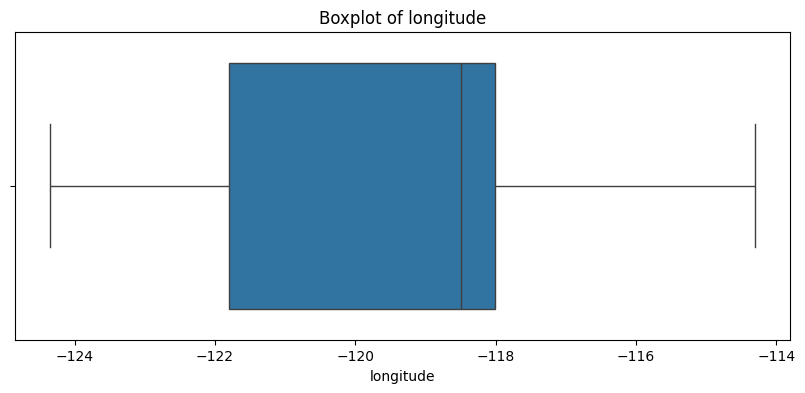

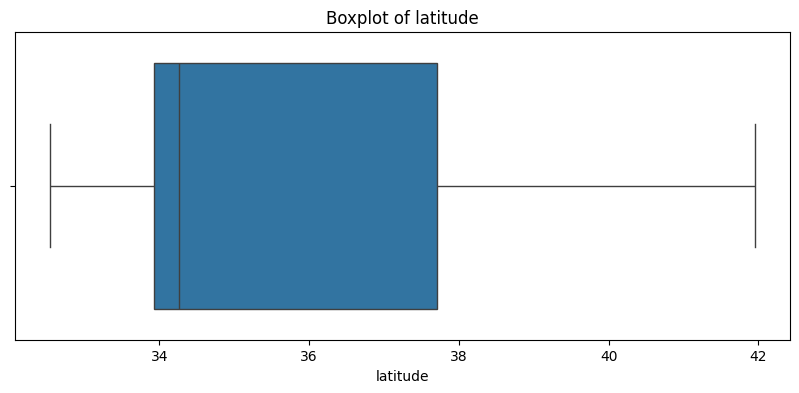

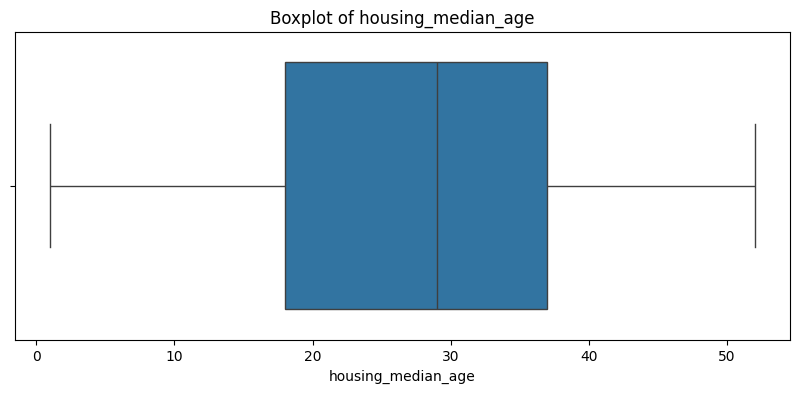

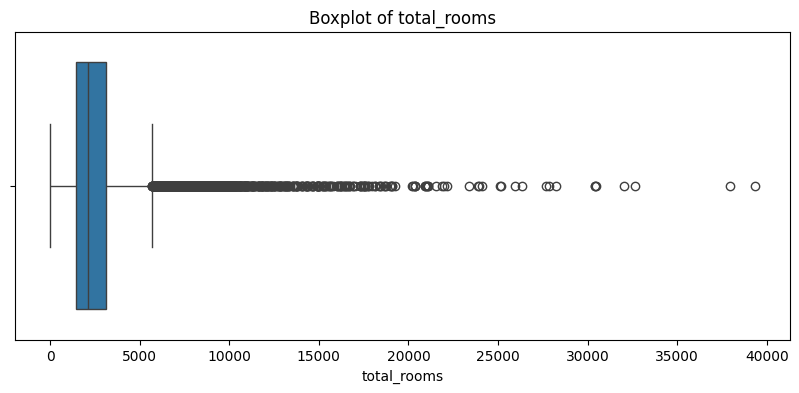

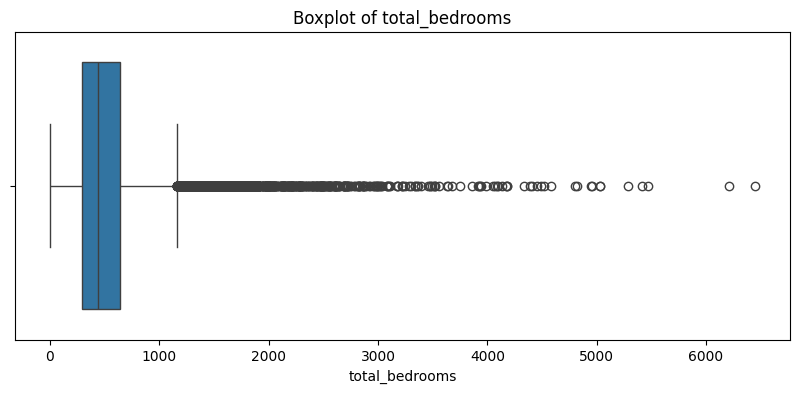

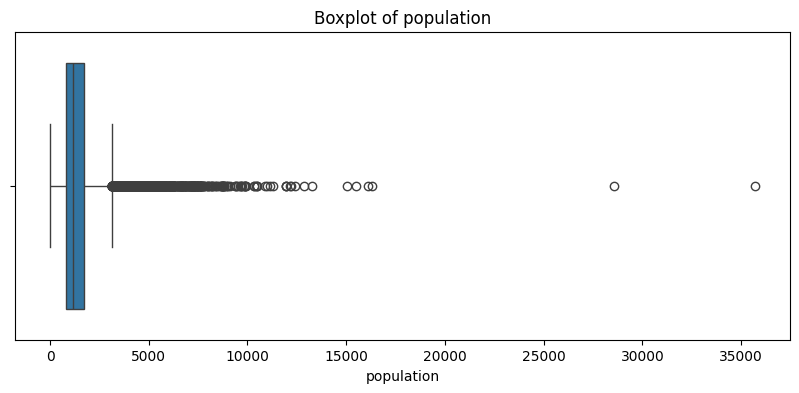

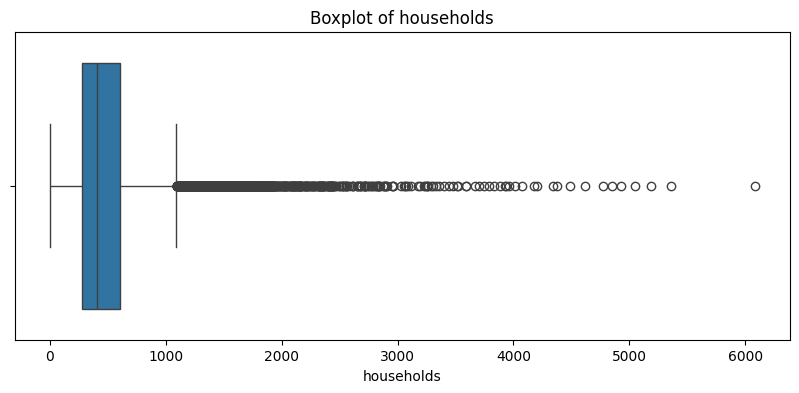

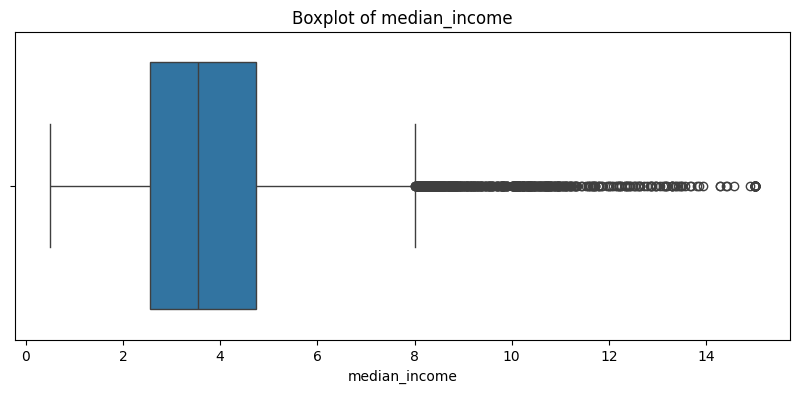

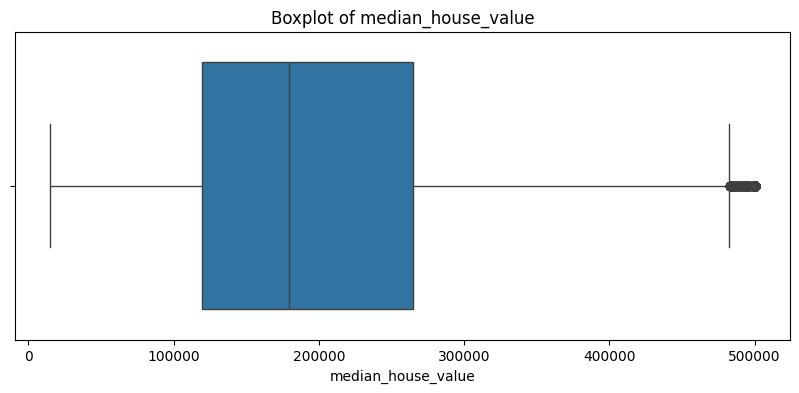

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


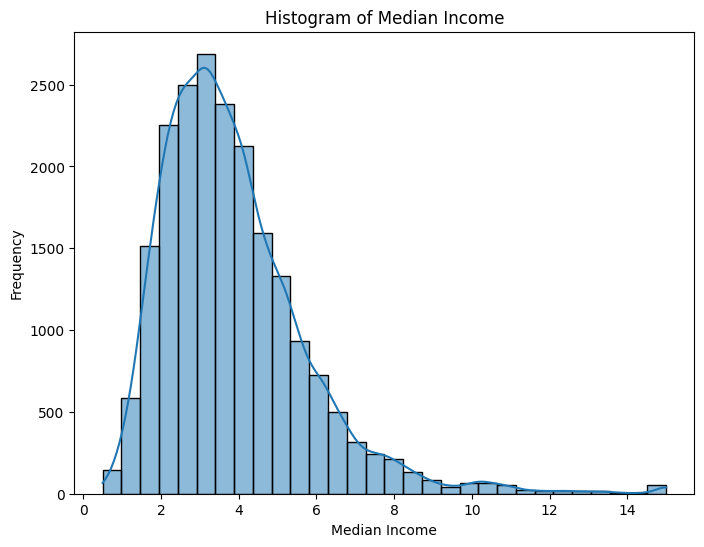

In [7]:
# Histogram for 'median_income'
plt.figure(figsize=(8,6))
sns.histplot(df['median_income'], bins=30, kde=True)
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows to confirm
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [9]:
import pandas as pd

# Assuming 'ocean_proximity' is a categorical column
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

# Display the first few rows of the encoded DataFrame
df_encoded.head()
# Display column names
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


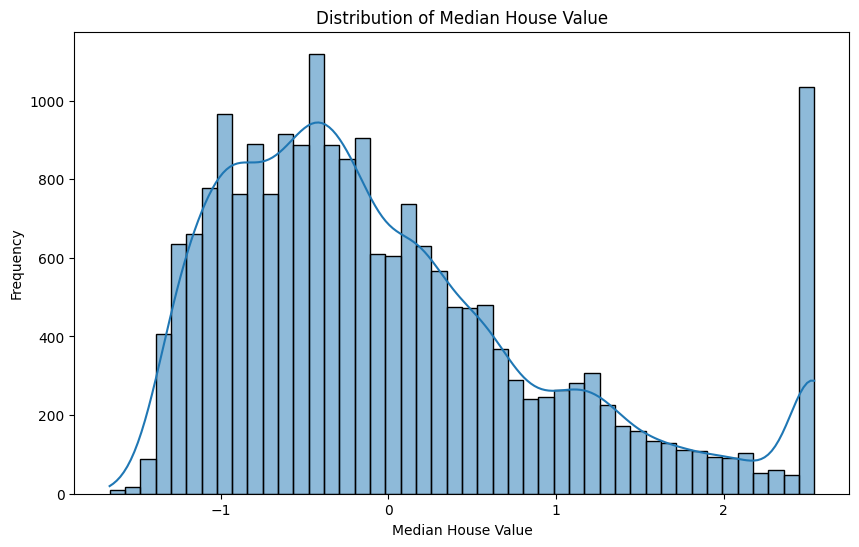

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical column, e.g., 'median_house_value'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


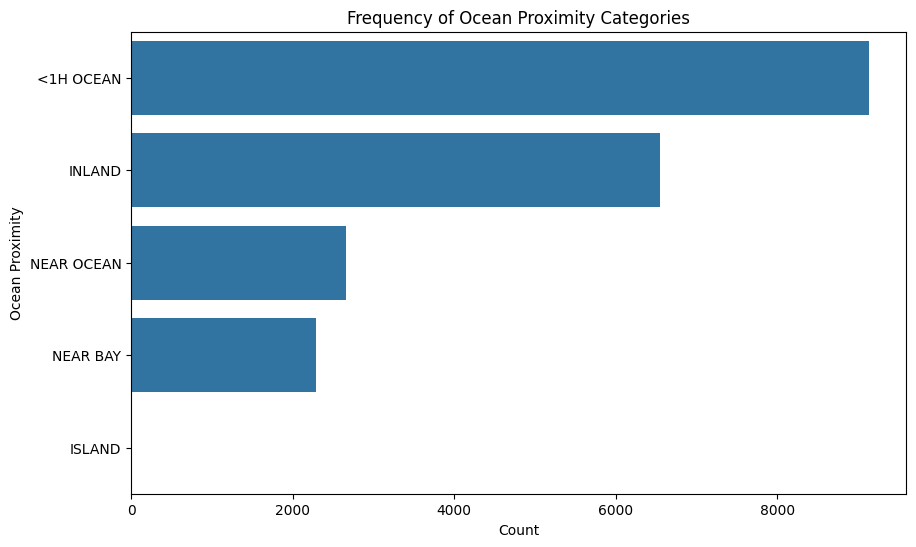

In [11]:
# Bar plot for the categorical column 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.countplot(y='ocean_proximity', data=df, order=df['ocean_proximity'].value_counts().index)
plt.title('Frequency of Ocean Proximity Categories')
plt.xlabel('Count')
plt.ylabel('Ocean Proximity')
plt.show()

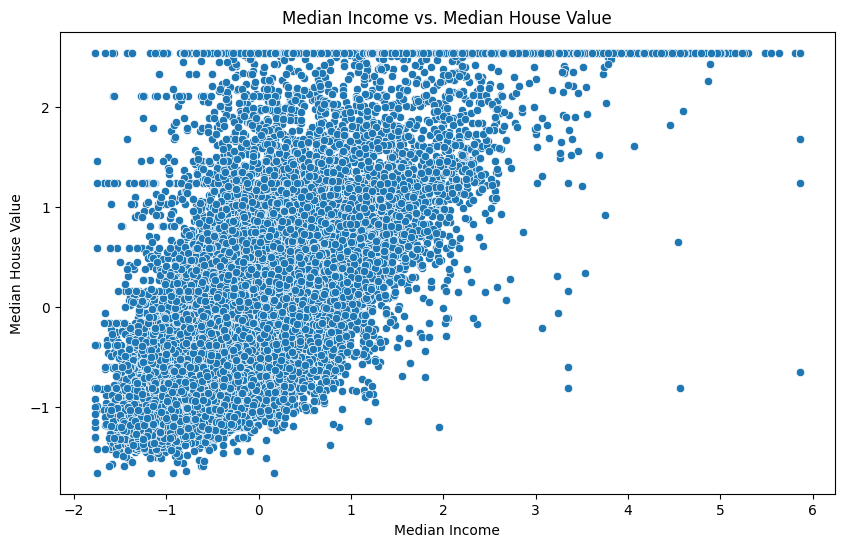

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between 'median_income' and 'median_house_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df_encoded)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


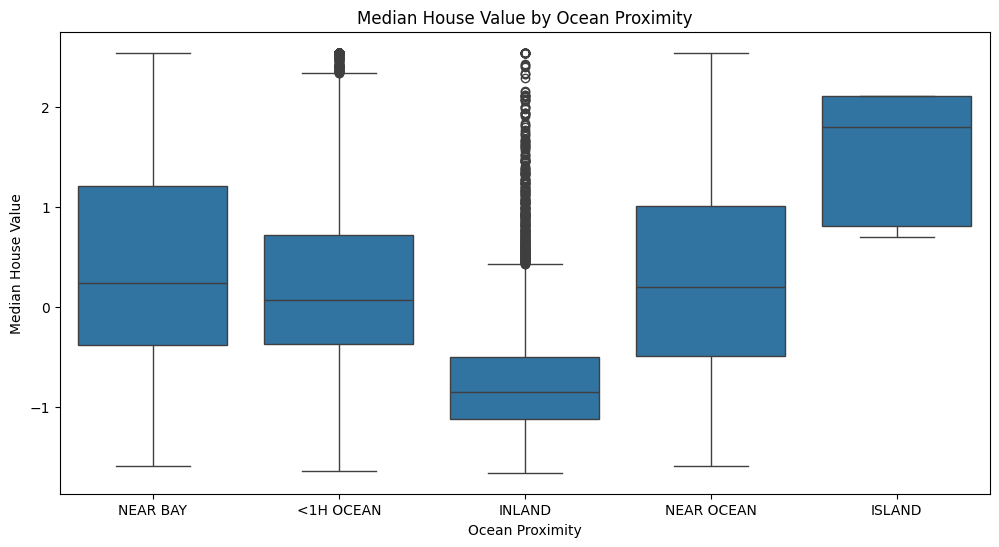

In [13]:
# Box plot for 'median_house_value' by 'ocean_proximity'
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()